In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1=pd.read_excel('ElecCarFault/phase2phase.xlsx')
df1.head()

,Time,Va,Vb,Vc,rpm,RPM_Ref,Ide,Idref,Iqe,Iqref,Ia,Ib,Ic
0,0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
1,0.00002,-2.211724e-18,-2.211724e-18,4.423447e-18,-3.603451e-25,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
2,0.00003,1.057457e-18,1.057457e-18,-2.114914e-18,-7.637045e-24,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
3,0.00004,-1.659852e-18,-1.659852e-18,3.319704e-18,-1.563044e-23,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
4,0.00005,1.345471e-18,1.345471e-18,-2.690942e-18,-2.434029e-23,0,-4.051893e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18


In [3]:
df1.columns

Index(['Time             ', 'Va               ', 'Vb               ',
       'Vc               ', 'rpm              ', 'RPM_Ref          ',
       'Ide              ', 'Idref            ', 'Iqe              ',
       'Iqref            ', 'Ia               ', 'Ib               ',
       'Ic               '],
      dtype='object')

In [4]:
#df1.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df1.columns=['Time','Va','Vb','Vc','rpm','RPM_Ref','Ide','Idref','Iqe','Iqref','Ia','Ib','Ic']
df1.head()

,Time,Va,Vb,Vc,rpm,RPM_Ref,Ide,Idref,Iqe,Iqref,Ia,Ib,Ic
0,0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
1,0.00002,-2.211724e-18,-2.211724e-18,4.423447e-18,-3.603451e-25,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
2,0.00003,1.057457e-18,1.057457e-18,-2.114914e-18,-7.637045e-24,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
3,0.00004,-1.659852e-18,-1.659852e-18,3.319704e-18,-1.563044e-23,0,-4.048661e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18
4,0.00005,1.345471e-18,1.345471e-18,-2.690942e-18,-2.434029e-23,0,-4.051893e-18,0.0,0.0,0.0,-4.051893e-18,-4.032505e-18,-4.029274e-18


In [7]:
data=df1[['Va','Vb','Vc']]
y_real=np.ones((data.shape[0],1))

In [5]:
normal=df1.loc[(df1['Time']<0.5)&(df1['Time']>0.2),['Va','Vb','Vc']]
y_normal_real=np.ones((normal.shape[0],1))

In [8]:
def define_generator():
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim)) #LeakyReLU #hidden node개수 256도 해보셈
    model.add(Dense(g_output, activation='linear'))
    return model

def define_discriminator():
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim=d_input)) #hidden node개수 256도 해보셈
    model.add(Dense(1, activation='sigmoid')) # True ,False 구분하는 이진 분류 같은거(sigmoid)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam or RMSprop
    return model

def define_gan(generator, discriminator):
    # 판별자는 따로 학습되고 있음
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def latent_data(n,g_input):
    latent=np.random.normal(size=[n,g_input])
    return latent

def fake_data(generator,latent_data):
    X_fake=generator.predict(latent_data)
    y_fake=np.zeros((latent_data.shape[0],1))
    return X_fake,y_fake

def train(g_model,d_model,gan_model,n_epochs=1000,n_batch=normal.shape[0],batch_size=128):
    batch_cnt=int(np.ceil(n_batch/batch_size))
    for epoch in range(n_epochs):
        for mini in range(batch_cnt):
            from_,to_=mini*batch_size,(mini+1)*batch_size
            if mini==batch_cnt-1:
                to_=n_batch
            X_real_batch=normal[from_:to_]
            y_real_batch=y_normal_real[from_:to_] #시계열 데이터 mini batch는 shuffle이 없는가?
            loss1=d_model.train_on_batch(X_real_batch,y_real_batch)
            
            X_Z=latent_data(X_real_batch.shape[0],latent_dim)#학습시킬 때 가짜데이터는 0.1 진짜 데이터는 0.9로 놓고 학습시켜보기
            Y_Z=np.ones((X_real_batch.shape[0],1))
            X_fake_batch,y_fake_batch=fake_data(g_model,latent_data=X_Z)
            
            loss2=d_model.train_on_batch(X_fake_batch,y_fake_batch) #real,fake를 concat해서 한번에 학습도 가능한데 결과가 달라질까?
            gan_model.train_on_batch(X_Z,Y_Z)
            
            #D_loss,D_acc=d_model.evaluate(X_fake_batch,y_fake_batch)

            d_loss=0.5*np.add(loss1,loss2)
            
            #GAN_loss,GAN_acc=gan_model.evaluate(X_Z,Y_Z)
        if epoch%100==0:
          #print('Epoch=%d, D_loss=%.4f, D_acc=%.4f' %(epoch,D_loss,D_acc))
          print('Epoch :',epoch,'/ [D_loss,D_acc] :',d_loss)
          summarize_performance(epoch,g_model,d_model,latent_dim)

def summarize_performance(epoch,generator, discriminator, latent_dim, n=100):
  lat=latent_data(n,latent_dim)
  x_fake, y_fake = fake_data(generator,lat)
	# evaluate discriminator on fake examples
  loss_fake, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
  print(epoch, loss_fake, acc_fake)

In [9]:
latent_dim=3 #어떤게 좋을까
d_input=normal.shape[1]
d_output=1
g_input=latent_dim
g_output=d_input
generator=define_generator()
discriminator=define_discriminator()
gan_model=define_gan(generator,discriminator)
train(generator,discriminator,gan_model)

Epoch : 0 / [D_loss,D_acc] : [0.02436501 1.        ]
0 0.04054776579141617 1.0
Epoch : 100 / [D_loss,D_acc] : [4.52322072 0.33333334]
100 3.3915581703186035 0.5
Epoch : 200 / [D_loss,D_acc] : [4.53585969 0.5       ]
200 0.04478439688682556 0.9800000190734863
Epoch : 300 / [D_loss,D_acc] : [2.46758729 0.26041667]
300 2.2930502891540527 0.3100000023841858
Epoch : 400 / [D_loss,D_acc] : [0.24897089 0.88541669]
400 0.07899191975593567 1.0
Epoch : 500 / [D_loss,D_acc] : [0.64493442 0.67708334]
500 1.0238665342330933 0.44999998807907104
Epoch : 600 / [D_loss,D_acc] : [0.5384254  0.72916669]
600 0.9534610509872437 0.5699999928474426
Epoch : 700 / [D_loss,D_acc] : [0.71543477 0.63541667]
700 0.7895671725273132 0.5400000214576721
Epoch : 800 / [D_loss,D_acc] : [0.49740568 0.8125    ]
800 0.711995542049408 0.6800000071525574
Epoch : 900 / [D_loss,D_acc] : [0.92889481 0.51041667]
900 0.11413194984197617 0.9900000095367432


시간이 너무 오래걸림
-> 정상데이터만 모아서 학습
-> 비정상데이터만 모아서 학습

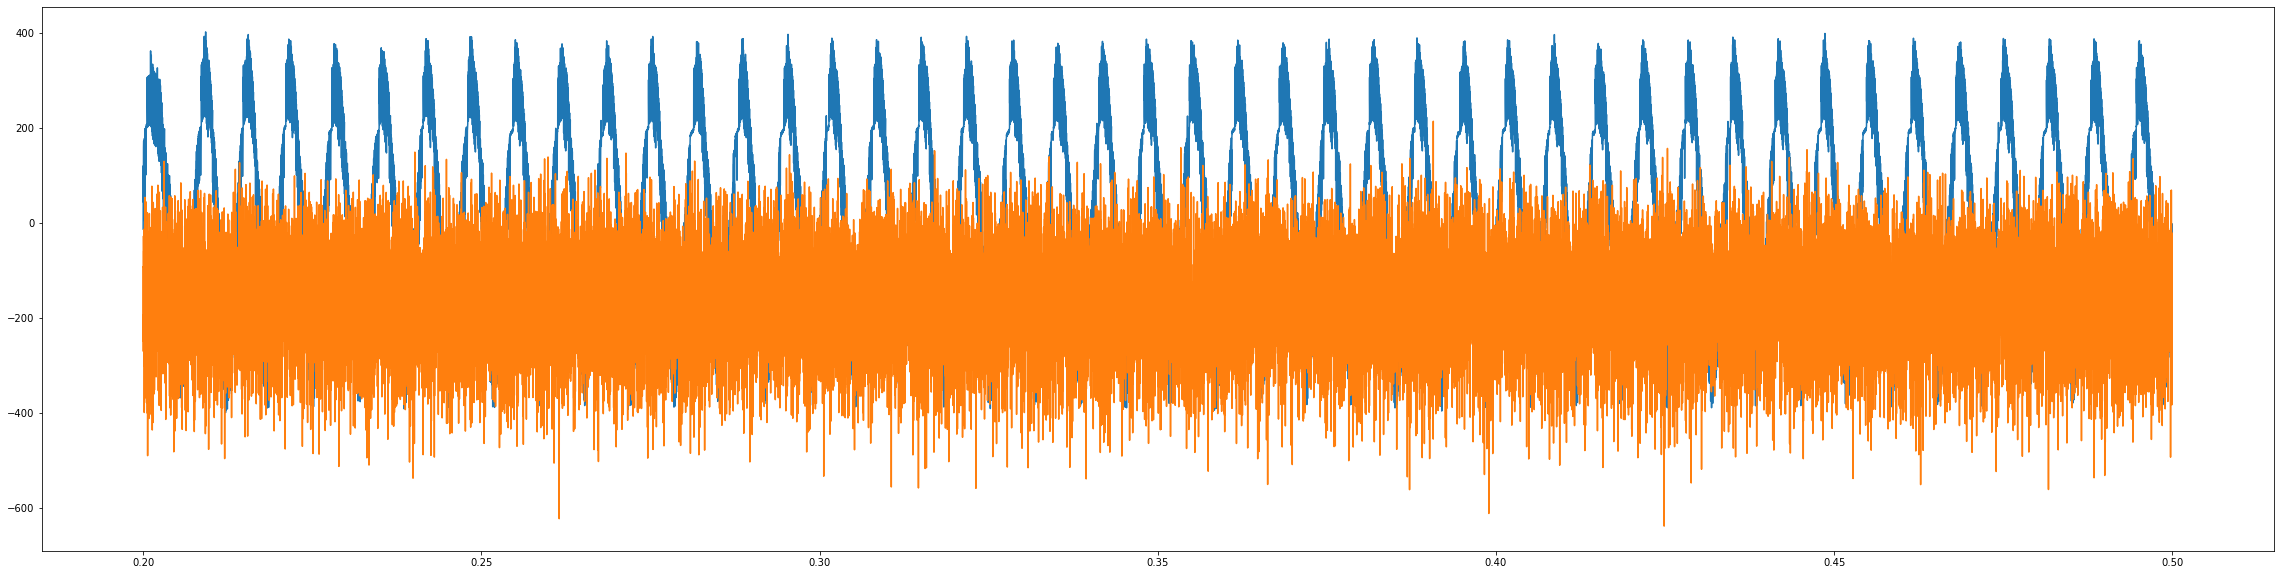

In [10]:
Z=latent_data(len(normal),g_input)
newdata=generator.predict(Z)
newdata=pd.DataFrame(newdata,columns=['Va','Vb','Vc'])
time=df1.loc[(df1.Time>0.2) & (df1.Time<0.5),'Time']
plt.figure(figsize=(40,10))
plt.plot(time,normal['Va'])
plt.plot(time,newdata['Va'])
plt.show()